# Customer Classification Project

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [5]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

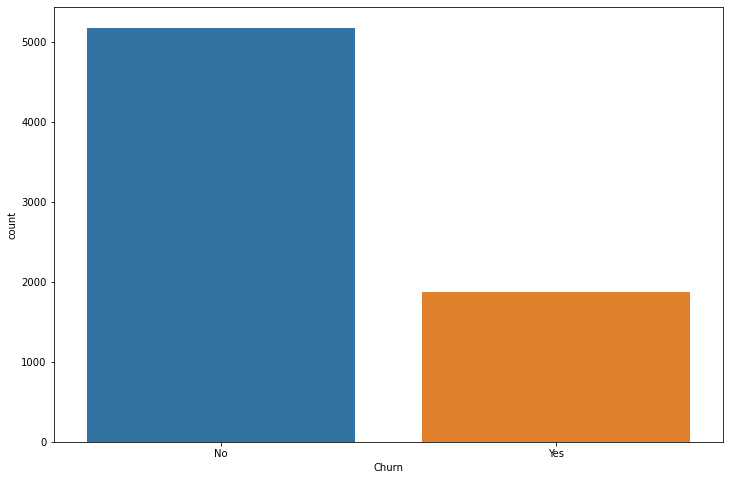

In [6]:
plt.figure(figsize = (12, 8))
sns.countplot(data = df, x = "Churn")

### Base Model Training

In [7]:
X = pd.get_dummies(df.drop("Churn", axis = 1), drop_first = True)
y = df["Churn"]

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_hold, y_train, y_hold = train_test_split(X, y, test_size = .2)

In [12]:
X_val, X_test, y_val, y_test = train_test_split(X_hold, y_hold, test_size = .5)

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
rfc = RandomForestClassifier()

In [15]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [16]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score

In [17]:
y_hat_val = rfc.predict(X_val)

In [19]:
print(classification_report(y_val, y_hat_val))

              precision    recall  f1-score   support

          No       0.81      0.92      0.86       507
         Yes       0.68      0.45      0.54       197

    accuracy                           0.79       704
   macro avg       0.74      0.68      0.70       704
weighted avg       0.77      0.79      0.77       704



In [21]:
cm = confusion_matrix(y_val, y_hat_val)

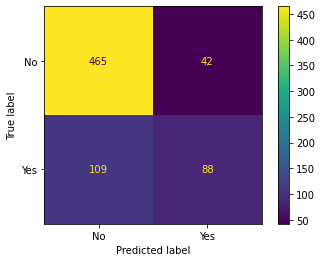

In [25]:
ConfusionMatrixDisplay(cm, display_labels = rfc.classes_, ).plot()

In [26]:
accuracy_score(y_val, y_hat_val)

0.7855113636363636

### Grid Seach Tuning

In [27]:
from sklearn.model_selection import GridSearchCV

In [29]:
param_grid = {"n_estimators": [10, 20, 50, 100, 200, 300], 
              "criterion": ["gini", "entropy", "log_loss"], 
              "max_features": ["sqrt", "log2", None]}

In [30]:
grid = GridSearchCV(rfc, param_grid)

In [31]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [10, 20, 50, 100, 200, 300]})

In [32]:
grid.best_params_

{'criterion': 'gini', 'max_features': None, 'n_estimators': 300}

In [33]:
y_hat_test = grid.predict(X_test)

In [34]:
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

          No       0.81      0.93      0.87       504
         Yes       0.73      0.45      0.55       201

    accuracy                           0.79       705
   macro avg       0.77      0.69      0.71       705
weighted avg       0.79      0.79      0.78       705



In [35]:
cm = confusion_matrix(y_test, y_hat_test)

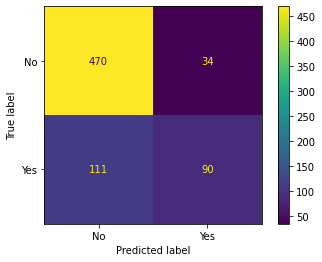

In [36]:
ConfusionMatrixDisplay(cm, display_labels = rfc.classes_).plot()